# IN-VEHICLE-COUPON-RECOMMENDATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

### PROBLEM STATEMENT

#### THE PURPOSE OF THIS MODEL IS TO PREDICT WHETHER A CUSTOMER ACCEPTS THE COUPON OR NOT 

###### 01. Destination: destination of user (No Urgent Place, Home, Work)
###### 02. Passenger: who are the passengers in the car (Alone, Friend(s), Kid(s), Partner)
###### 03. Weather: weather when user is driving (Sunny, Rainy, Snowy)
###### 04. Temperature: temperature in Fahrenheit when user is driving (55, 80, 30)
###### 05. Time: time when user driving (2PM, 10AM, 6PM, 7AM, 10PM)
###### 06. Coupon: coupon type offered by company (Restaurant(dollar <20), Coffee House, Carry out & Take away, Bar, Restaurant(dollar 20-50))
###### 07. Expiration: coupon expires in 1 day or in 2 hours (1d, 2h)
###### 08. Gender: Female, Male
###### 09. Age: 21, 46, 26, 31, 41, 50plus, 36, below21
###### 10. Marital Status: Unmarried partner, Single, Married partner, Divorced, Widowed
###### 11. has_Children: 1: has children, 0: No children
###### 12. Education: Some college — no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
###### 13. Occupation: unique 25 number of occupation of users (Unemployed, Architecture & Engineering, Student,Education&Training&Library, Healthcare Support,Healthcare Practitioners & Technical, Sales & Related, Management,Arts Design Entertainment Sports & Media, Computer & Mathematical,Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry)
###### 14. Income: income of user (Less than dollar 12500,dollar 12500 — dollar 24999,dollar 25000 — dollar 37499,dollar 37500 — dollar 49999,dollar 50000 — dollar 62499,dollar 62500 —dollar 74999,dollar 75000 — dollar 87499,dollar 87500 — dollar 99999,dollar 100000 or More)
###### 15. Car : Description of vehicle which driven by user (Scooter and motorcycle, crossover, Mazda5)
###### 16. Bar: how many times does the user go to a bar every month? (never, less1, 1~3, 4~8, gt8, nan)
###### 17. CoffeeHouse: how many times does the user go to a coffeehouse every month? (never, less1, 1~3, 4~8, gt8, nan)
###### 18. CarryAway: how many times does the user get take-away food every month? (never, less1, 1~3, 4~8, gt8, nan)
###### 19. RestaurantLessThan20: how many times does the user go to a restaurant with an average expense per person of less than dollar20 every month? (never, less1, 1~3, 4~8, gt8, nan)
###### 20. Restaurant20To50: how many times does the user go to a restaurant with average expense per person of dollar 20 — dollar 50 every month? (never, less1, 1~3, 4~8, gt8, nan)
###### 21. toCoupon_GEQ5min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)
###### 22. toCoupon_GEQ15min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)
###### 23. toCoupon_GEQ25min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)
###### 24. direction_same: whether the restaurant/cafe/bar is in the same direction as user’s current destination (0,1)
###### 25. direction_opp: whether the restaurant/cafe/bar is in the opposite direction as user’s current destination (0,1)
###### 26. Y: whether the coupon is accepted or rejected, 1:accepted, 0:rejected

In [2]:
df = pd.read_csv('C:\\Users\\lavi\\Desktop\\New folder\\in-vehicle-coupon-recommendation.csv')

In [4]:
df.head(30)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.coupon.value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [8]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [9]:
df.isnull().sum().sort_values(ascending=False) * 100 /len(df)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

Observations :

1.The car veriable has null values more than 95% so we drop the column.  

In [10]:
#Dropping the car veriable  
df=df.drop(["car"],axis=1)

In [11]:
# Selecting all object type columns
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [12]:
# Exploring Object Type Columns
for col in cat_cols:
    print("Unique Value count : ", col, '\n')
    print('Count: ', len(df[col].unique()),'\n\n')

Unique Value count :  destination 

Count:  3 


Unique Value count :  passanger 

Count:  4 


Unique Value count :  weather 

Count:  3 


Unique Value count :  time 

Count:  5 


Unique Value count :  coupon 

Count:  5 


Unique Value count :  expiration 

Count:  2 


Unique Value count :  gender 

Count:  2 


Unique Value count :  age 

Count:  8 


Unique Value count :  maritalStatus 

Count:  5 


Unique Value count :  education 

Count:  6 


Unique Value count :  occupation 

Count:  25 


Unique Value count :  income 

Count:  9 


Unique Value count :  Bar 

Count:  6 


Unique Value count :  CoffeeHouse 

Count:  6 


Unique Value count :  CarryAway 

Count:  6 


Unique Value count :  RestaurantLessThan20 

Count:  6 


Unique Value count :  Restaurant20To50 

Count:  6 




In [13]:
## Checking the value counts of Categorical Columns
## Exploring Object Type Columns
for col in cat_cols[:]:
    print("Value count : ", col, '\n')
    print(df[col].value_counts(),'\n\n')

Value count :  destination 

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64 


Value count :  passanger 

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64 


Value count :  weather 

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64 


Value count :  time 

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64 


Value count :  coupon 

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64 


Value count :  expiration 

1d    7091
2h    5593
Name: expiration, dtype: int64 


Value count :  gender 

Female    6511
Male      6173
Name: gender, dtype: int64 


Value count :  age 

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21    

In [14]:
#non_cat_cols = df.select_dtypes(include!='object').columns.to_list()
#non_cat_cols
non_cat_cols = [i for i in df.columns if df[i].dtype != 'O']
non_cat_cols

['temperature',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

In [15]:
for col in non_cat_cols:
    print("Unique Value count : ", col, '\n')
    print('Count: ', len(df[col].unique()),'\n\n')

Unique Value count :  temperature 

Count:  3 


Unique Value count :  has_children 

Count:  2 


Unique Value count :  toCoupon_GEQ5min 

Count:  1 


Unique Value count :  toCoupon_GEQ15min 

Count:  2 


Unique Value count :  toCoupon_GEQ25min 

Count:  2 


Unique Value count :  direction_same 

Count:  2 


Unique Value count :  direction_opp 

Count:  2 


Unique Value count :  Y 

Count:  2 




In [16]:
for col in non_cat_cols[1:]:
    print("Value count : ", col, '\n')
    print(df[col].value_counts(),'\n\n')

Value count :  has_children 

0    7431
1    5253
Name: has_children, dtype: int64 


Value count :  toCoupon_GEQ5min 

1    12684
Name: toCoupon_GEQ5min, dtype: int64 


Value count :  toCoupon_GEQ15min 

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64 


Value count :  toCoupon_GEQ25min 

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64 


Value count :  direction_same 

0    9960
1    2724
Name: direction_same, dtype: int64 


Value count :  direction_opp 

1    9960
0    2724
Name: direction_opp, dtype: int64 


Value count :  Y 

1    7210
0    5474
Name: Y, dtype: int64 




In [17]:
## Missing values
miss_values = df.isnull().sum()
print(type(miss_values))
miss_values[miss_values > 0]

<class 'pandas.core.series.Series'>


Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64

In [18]:
for col in df.columns:
    if df[col].isnull().sum() and df[col].dtype == 'object':
        df[col].loc[(df[col].isnull())] = df[col].mode().max()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

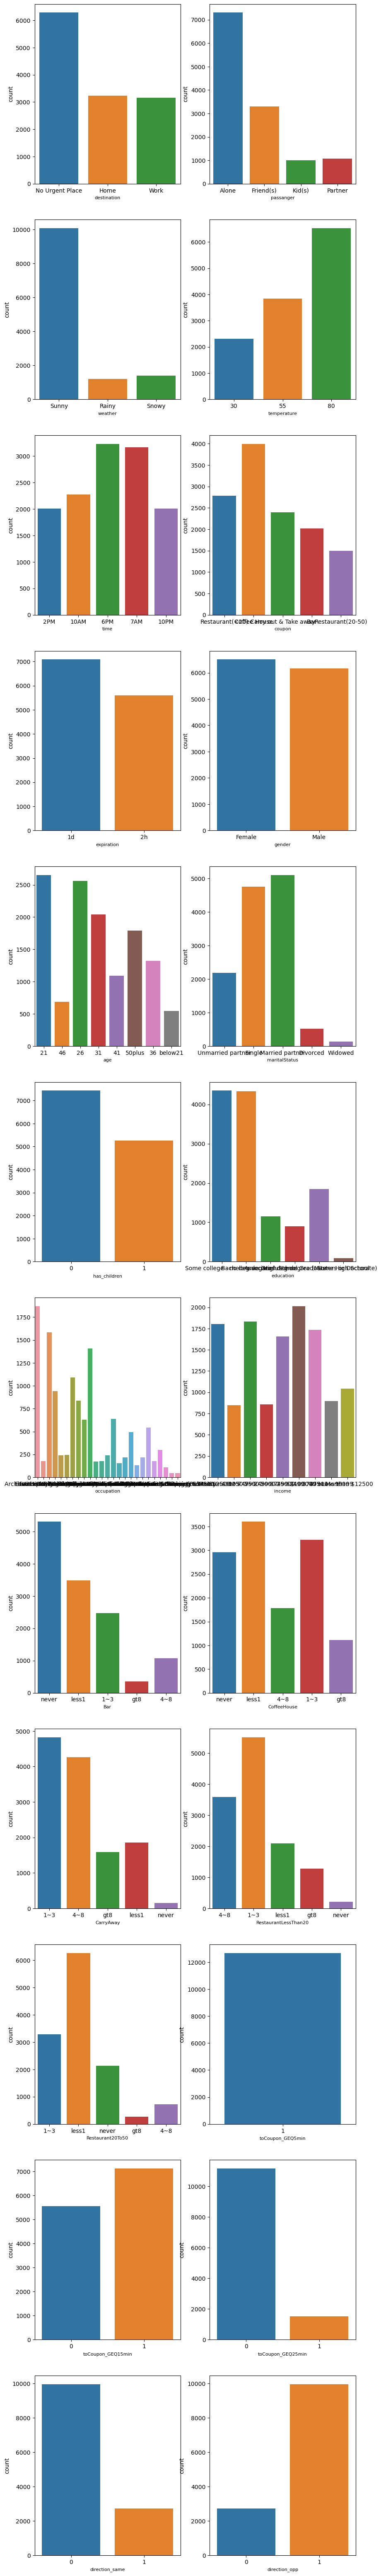

In [20]:
cont=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon','expiration','gender','age','maritalStatus',
      'has_children','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50',
      'toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp']
plt.figure(figsize=(10,80))
n=1
for i in cont:
    ax= plt.subplot(12,2,n)
    sns.countplot(df[i])
    plt.xlabel(i,fontsize=8)
    n+=1
plt.show()

In [21]:
import scipy.stats
from scipy.stats import chi2_contingency

In [22]:
ct_dest = pd.crosstab(df.Y, df.destination)
chi2_contingency(ct_dest, correction = False)

(216.79107304896826,
 8.40265678045787e-48,
 2,
 array([[1396.98344371, 2711.53752759, 1365.4790287 ],
        [1840.01655629, 3571.46247241, 1798.5209713 ]]))

In [23]:
ct_pass = pd.crosstab(df.Y, df.passanger)
chi2_contingency(ct_pass, correction = False)

(222.03698440044332,
 7.284119805592037e-48,
 3,
 array([[3152.59933775, 1423.30905077,  434.15673289,  463.93487859],
        [4152.40066225, 1874.69094923,  571.84326711,  611.06512141]]))

In [24]:
ct_weather = pd.crosstab(df.Y, df.weather)
chi2_contingency(ct_weather, correction = False)

(138.5248252729253,
 8.312207740720093e-31,
 2,
 array([[ 522.19646799,  606.35209713, 4345.45143488],
        [ 687.80353201,  798.64790287, 5723.54856512]]))

In [25]:
ct_temp = pd.crosstab(df.Y, df.temperature)
chi2_contingency(ct_temp, correction = False)

(55.99640606998973,
 6.92683621224045e-13,
 2,
 array([[ 999.50993377, 1657.21854305, 2817.27152318],
        [1316.49006623, 2182.78145695, 3710.72847682]]))

In [26]:
ct_time = pd.crosstab(df.Y, df.time)
chi2_contingency(ct_time, correction = False)

(175.10786986701888,
 8.37562170116923e-37,
 4,
 array([[ 981.81567329,  865.72406181,  867.0187638 , 1393.96247241,
         1365.4790287 ],
        [1293.18432671, 1140.27593819, 1141.9812362 , 1836.03752759,
         1798.5209713 ]]))

In [27]:
ct_coupon = pd.crosstab(df.Y, df.time)
chi2_contingency(ct_coupon, correction = False)

(175.10786986701888,
 8.37562170116923e-37,
 4,
 array([[ 981.81567329,  865.72406181,  867.0187638 , 1393.96247241,
         1365.4790287 ],
        [1293.18432671, 1140.27593819, 1141.9812362 , 1836.03752759,
         1798.5209713 ]]))

In [28]:
ct_expiration = pd.crosstab(df.Y, df.expiration)
chi2_contingency(ct_expiration, correction = False)

(214.09640409327557,
 1.7546341886084612e-48,
 1,
 array([[3060.24392936, 2413.75607064],
        [4030.75607064, 3179.24392936]]))

In [29]:
ct_gender = pd.crosstab(df.Y, df.gender)
chi2_contingency(ct_gender, correction = False)

(24.52181593722746,
 7.347321280363793e-07,
 1,
 array([[2809.93487859, 2664.06512141],
        [3701.06512141, 3508.93487859]]))

In [30]:
ct_age = pd.crosstab(df.Y, df.age)
chi2_contingency(ct_age, correction = False)

(63.15874841535178,
 3.522142236629583e-11,
 7,
 array([[1144.94812362, 1104.3807947 ,  879.96578366,  569.23730684,
          471.70309051,  296.05518764,  771.64238411,  236.06732892],
        [1508.05187638, 1454.6192053 , 1159.03421634,  749.76269316,
          621.29690949,  389.94481236, 1016.35761589,  310.93267108]]))

In [31]:
ct_maritalStatus = pd.crosstab(df.Y, df.maritalStatus)
chi2_contingency(ct_maritalStatus, correction = False)

(48.77999591154126,
 6.48964798323251e-10,
 4,
 array([[ 222.68874172, 2200.99337748, 2050.80794702,  943.40618102,
           56.10375276],
        [ 293.31125828, 2899.00662252, 2701.19205298, 1242.59381898,
           73.89624724]]))

In [32]:
ct_has_children = pd.crosstab(df.Y, df.has_children)
chi2_contingency(ct_has_children, correction = False)

(26.32506229228059,
 2.885202577938465e-07,
 1,
 array([[3206.97682119, 2267.02317881],
        [4224.02317881, 2985.97682119]]))

In [33]:
ct_education = pd.crosstab(df.Y, df.education)
chi2_contingency(ct_education, correction = False)

(41.673351660945656,
 6.858463266342188e-08,
 5,
 array([[ 497.59713024, 1870.84437086,  799.26269316,  390.56843267,
           37.97792494, 1877.74944812],
        [ 655.40286976, 2464.15562914, 1052.73730684,  514.43156733,
           50.02207506, 2473.25055188]]))

In [34]:
ct_occupation = pd.crosstab(df.Y, df.occupation)
chi2_contingency(ct_occupation, correction = False)

(119.89330764278967,
 1.0136827151270322e-14,
 24,
 array([[  75.52428256,  271.45584989,   18.98896247,  234.77262693,
          104.00772627,  607.64679912,   66.46136865,  406.96799117,
           18.55739514,  128.60706402,  105.30242826,  104.4392936 ,
           57.39845475,   94.51324503,   73.36644592,  361.65342163,
          275.77152318,   75.52428256,   47.47240618,   75.52428256,
          213.62582781,  471.70309051,  683.60264901,   94.0816777 ,
          807.03090508],
        [  99.47571744,  357.54415011,   25.01103753,  309.22737307,
          136.99227373,  800.35320088,   87.53863135,  536.03200883,
           24.44260486,  169.39293598,  138.69757174,  137.5607064 ,
           75.60154525,  124.48675497,   96.63355408,  476.34657837,
          363.22847682,   99.47571744,   62.52759382,   99.47571744,
          281.37417219,  621.29690949,  900.39735099,  123.9183223 ,
         1062.96909492]]))

In [35]:
ct_income = pd.crosstab(df.Y, df.income)
chi2_contingency(ct_income, correction = False)

(49.88268726622557,
 4.30446851198096e-08,
 8,
 array([[ 749.200883  ,  790.19977925,  868.74503311,  778.9790287 ,
          715.97019868,  365.10596026,  369.85320088,  386.25275938,
          449.69315673],
        [ 986.799117  , 1040.80022075, 1144.25496689, 1026.0209713 ,
          943.02980132,  480.89403974,  487.14679912,  508.74724062,
          592.30684327]]))

In [36]:
ct_bar = pd.crosstab(df.Y, df.Bar)
chi2_contingency(ct_bar, correction = False)

(78.79615560606989,
 3.133234600310471e-16,
 4,
 array([[1067.26600442,  464.36644592,  150.61699779, 1502.71743929,
         2289.03311258],
        [1405.73399558,  611.63355408,  198.38300221, 1979.28256071,
         3014.96688742]]))

In [37]:
ct_CoffeeHouse = pd.crosstab(df.Y, df.CoffeeHouse)
chi2_contingency(ct_CoffeeHouse, correction = False)

(278.7370103342187,
 4.171544970829023e-59,
 4,
 array([[1391.80463576,  769.91611479,  479.47130243, 1554.50551876,
         1278.30242826],
        [1833.19536424, 1014.08388521,  631.52869757, 2047.49448124,
         1683.69757174]]))

In [38]:
ct_CarryAway = pd.crosstab(df.Y, df.CarryAway)
chi2_contingency(ct_CarryAway, correction = False)

(43.87561791709738,
 6.808987792859379e-09,
 4,
 array([[2081.44922737, 1837.61368653,  687.9183223 ,  800.98896247,
           66.02980132],
        [2741.55077263, 2420.38631347,  906.0816777 , 1055.01103753,
           86.97019868]]))

In [39]:
ct_RestaurantLessThan20 = pd.crosstab(df.Y, df.RestaurantLessThan20)
chi2_contingency(ct_RestaurantLessThan20, correction = False)

(23.30991222502021,
 0.00010979372427199479,
 4,
 array([[2376.20971302, 1545.01103753,  554.56401766,  903.27041943,
           94.94481236],
        [3129.79028698, 2034.98896247,  730.43598234, 1189.72958057,
          125.05518764]]))

In [40]:
ct_Restaurant20To50 = pd.crosstab(df.Y, df.Restaurant20To50)
chi2_contingency(ct_Restaurant20To50, correction = False)

(67.1632914993896,
 9.005798285828938e-14,
 4,
 array([[1419.85651214,  314.18101545,  113.93377483, 2704.200883  ,
          921.82781457],
        [1870.14348786,  413.81898455,  150.06622517, 3561.799117  ,
         1214.17218543]]))

In [41]:
ct_toCoupon_GEQ5min = pd.crosstab(df.Y, df.toCoupon_GEQ5min)
chi2_contingency(ct_toCoupon_GEQ5min, correction = False)

(0.0,
 1.0,
 0,
 array([[5474.],
        [7210.]]))

In [42]:
ct_toCoupon_GEQ15min = pd.crosstab(df.Y, df.toCoupon_GEQ15min)
chi2_contingency(ct_toCoupon_GEQ15min, correction = False)

(84.4603781370004,
 3.919922396121915e-20,
 1,
 array([[2400.37748344, 3073.62251656],
        [3161.62251656, 4048.37748344]]))

In [43]:
ct_toCoupon_GEQ25min = pd.crosstab(df.Y, df.toCoupon_GEQ25min)
chi2_contingency(ct_toCoupon_GEQ25min, correction = False)

(136.22437118966465,
 1.7821108429717032e-31,
 1,
 array([[4821.901766,  652.098234],
        [6351.098234,  858.901766]]))

In [44]:
ct_direction_same = pd.crosstab(df.Y, df.direction_same)
chi2_contingency(ct_direction_same, correction = False)

(2.6927316783983306,
 0.10080686003677973,
 1,
 array([[4298.41059603, 1175.58940397],
        [5661.58940397, 1548.41059603]]))

In [45]:
ct_direction_opp = pd.crosstab(df.Y, df.direction_opp)
chi2_contingency(ct_direction_opp, correction = False)

(2.6927316783983306,
 0.10080686003677973,
 1,
 array([[1175.58940397, 4298.41059603],
        [1548.41059603, 5661.58940397]]))

In [46]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [47]:
df.drop(["direction_opp","direction_same","toCoupon_GEQ5min"],axis=1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,0,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

### Bivariate Analysis

Text(0.5, 1.0, 'Y=1')

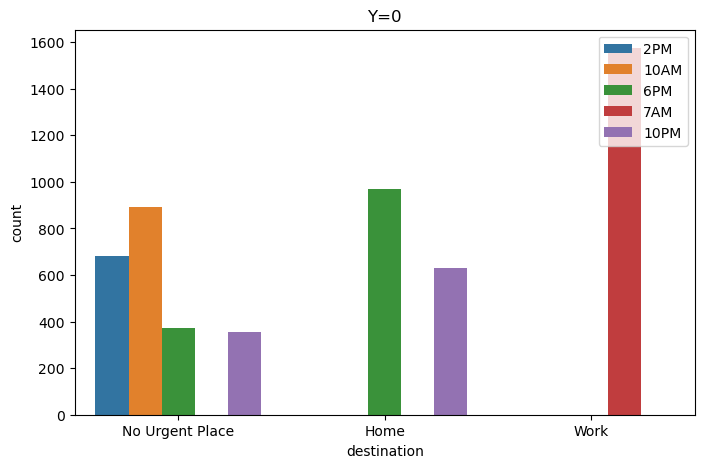

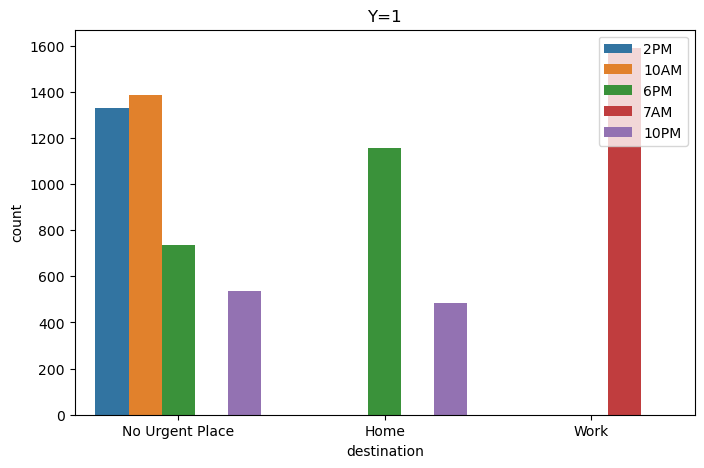

In [49]:
#Destination vs Time
no = df.loc[df['Y'] == 0, ['destination']]
plt.figure(figsize=(8,5))
sns.countplot(x = no['destination'], hue = df['time'], data = df)
plt.legend(loc="upper right")
plt.title('Y=0')


yes = df.loc[df['Y'] == 1, ['destination']]
plt.figure(figsize=(8,5))
sns.countplot(x = yes['destination'], hue = df['time'], data = df)
plt.legend(loc="upper right")
plt.title('Y=1')


1. At 7 AM, only working users are going out.
2. At 2 PM and 10 AM Users only go to No Urgent Place.
3. Maximum users accept coupons when the time is 2 PM and 10 AM.



Text(0.5, 1.0, 'Y=1')

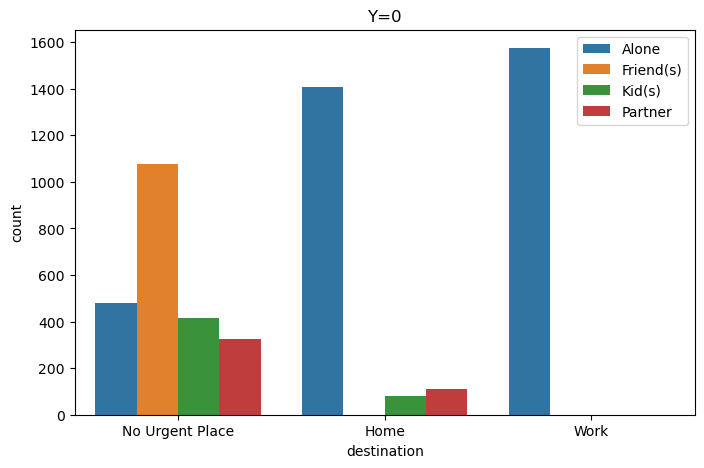

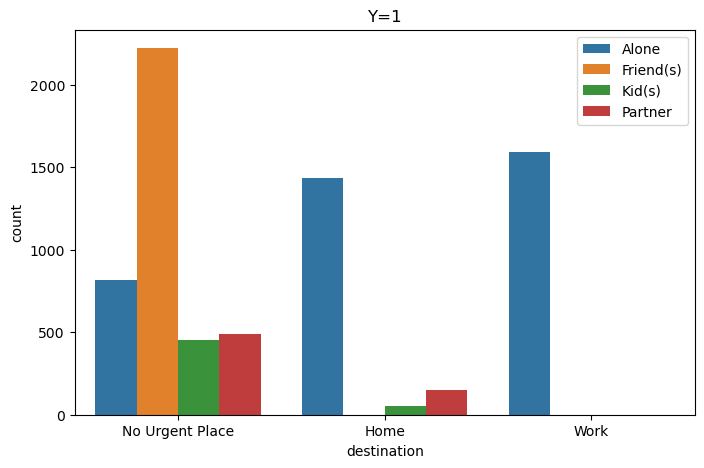

In [50]:
#Destination and passanger
no = df.loc[df['Y'] == 0, ['destination']]
plt.figure(figsize=(8,5))
sns.countplot(x = no['destination'], hue = df['passanger'], data = df)
plt.legend(loc="upper right")
plt.title('Y=0')

yes = df.loc[df['Y'] == 1, ['destination']]
plt.figure(figsize=(8,5))
sns.countplot(x = yes['destination'], hue = df['passanger'], data = df)
plt.legend(loc="upper right")
plt.title('Y=1')


1. The users who go with Friends have only No Urgent Place destination
2.  Maximum users accept coupons when the destination is No Urgent Place, and the co-passanger is Friends.

Text(0.5, 1.0, 'Y=1')

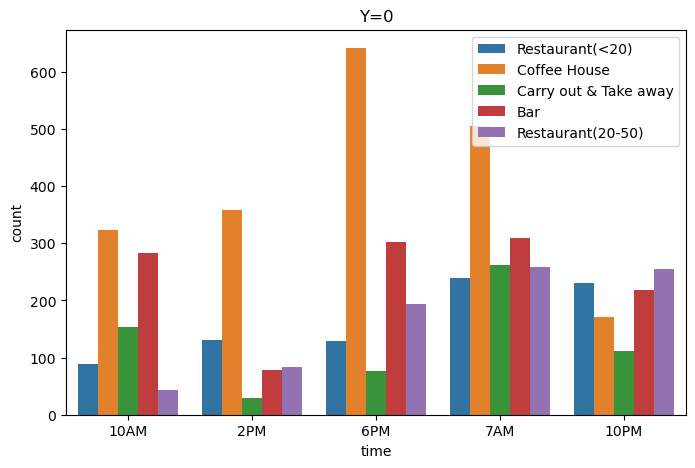

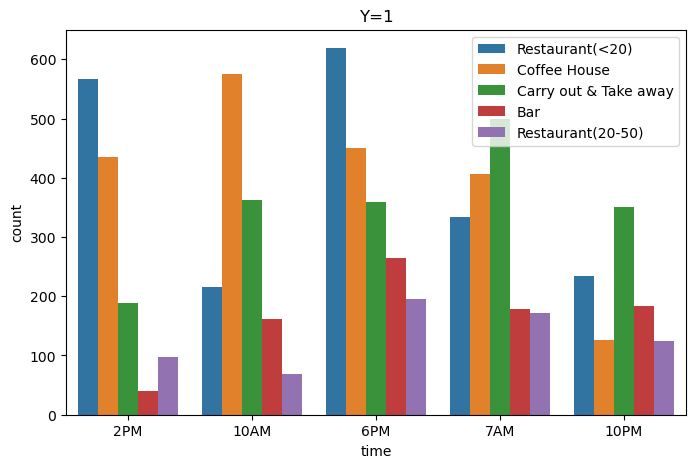

In [51]:
#Time vs Coupon
no = df.loc[df['Y'] == 0, ['time']]
plt.figure(figsize=(8,5))
sns.countplot(x = no['time'], hue = df['coupon'], data = df)
plt.legend(loc="upper right")
plt.title('Y=0')

yes = df.loc[df['Y'] == 1, ['time']]
plt.figure(figsize=(8,5))
sns.countplot(x = yes['time'], hue = df['coupon'], data = df)
plt.legend(loc="upper right")
plt.title('Y=1')

1. At 2 PM and 6 PM, users mostly accept Restaurant(<20), coffee house coupons. 
2. At 7 AM, 10AM, 2PM and 6 PM, Coffee House coupon ask is maximum.
3. At 10 PM, mostly Carry out and Take away and Restaurant(<20) coupons are accepted, and Restaurant(20–50) coupons are rejected.
4. Users mostly reject coupons for Bar at 7 AM, 10 AM, and 2 PM.

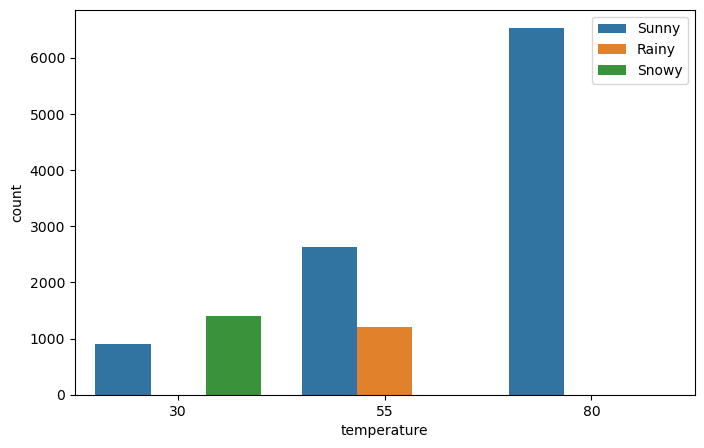

In [52]:
#Temperature vs Weather

plt.figure(figsize=(8,5))
sns.countplot(x = df['temperature'], hue = df['weather'], data = df)
plt.legend(loc="upper right")



1. Most Users prefer to go out when the weather is Sunny and also they have a high coupon acceptance ratio.

Text(0.5, 1.0, 'Y=1')

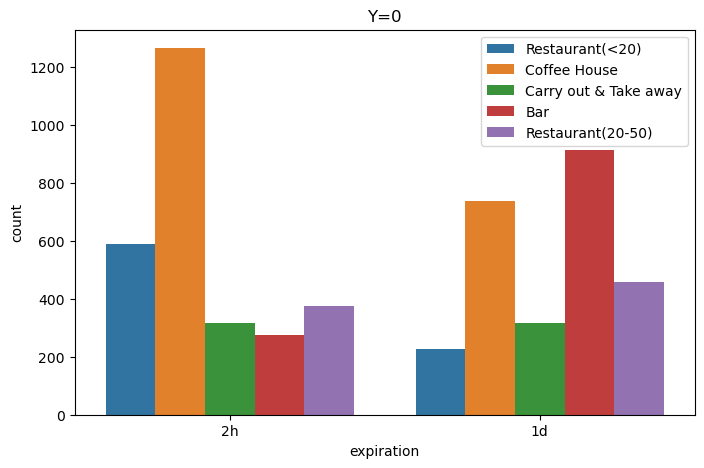

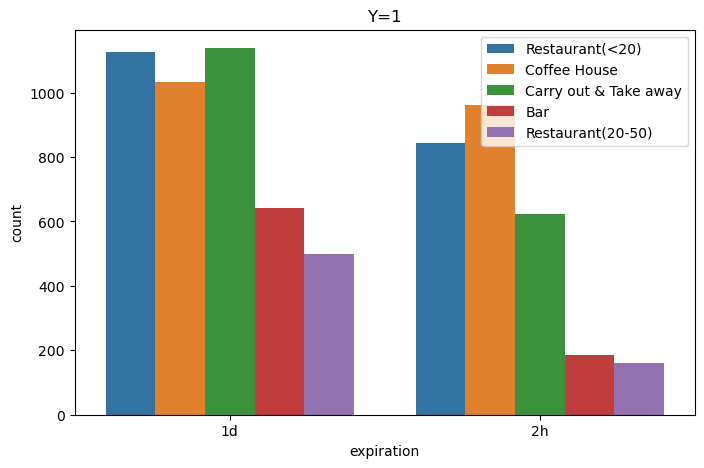

In [54]:
#Expiration vs coupon
no = df.loc[df['Y'] == 0, ['expiration']]
plt.figure(figsize=(8,5))
sns.countplot(x = no['expiration'], hue = df['coupon'], data = df)
plt.legend(loc="upper right")
plt.title('Y=0')


yes = df.loc[df['Y'] == 1, ['expiration']]
plt.figure(figsize=(8,5))
sns.countplot(x = yes['expiration'], hue = df['coupon'], data = df)
plt.legend(loc="upper right")
plt.title('Y=1')


1. Most Users prefer to accept 1d expiration coupons than 2h expiration coupons.
2. Users mostly accept the 1d expiration of Restaurant(<20), Carry out and Take away, and coffee house coupons.
3. Users mainly do not prefer to accept expensive Restaurant and bar coupons with a low expiration time (2h). 

In [53]:
coupon_freq = df[["Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]]


In [54]:

coupon_freq = []
for i in range(df.shape[0]):
    if (list(df['coupon'])[i] == 'Restaurant(<20)'):
        coupon_freq.append(list(df['RestaurantLessThan20'])[i])
    elif (list(df['coupon'])[i] == 'Coffee House'):
        coupon_freq.append(list(df['CoffeeHouse'])[i])
    elif (list(df['coupon'])[i] == 'Carry out & Take away'):
        coupon_freq.append(list(df['CarryAway'])[i])
    elif (list(df['coupon'])[i] == 'Bar'):
        coupon_freq.append(list(df['Bar'])[i])
    elif (list(df['coupon'])[i] == 'Restaurant(20-50)'):
        coupon_freq.append(list(df['Restaurant20To50'])[i])
        
df['coupon_freq'] = coupon_freq
print('Unique values:',df['coupon_freq'].unique())
print('-'*50)
df['coupon_freq'].describe()

Unique values: ['4~8' 'never' '1~3' 'less1' 'gt8']
--------------------------------------------------


count     12684
unique        5
top         1~3
freq       3892
Name: coupon_freq, dtype: object

Text(0.5, 1.0, 'Y=1')

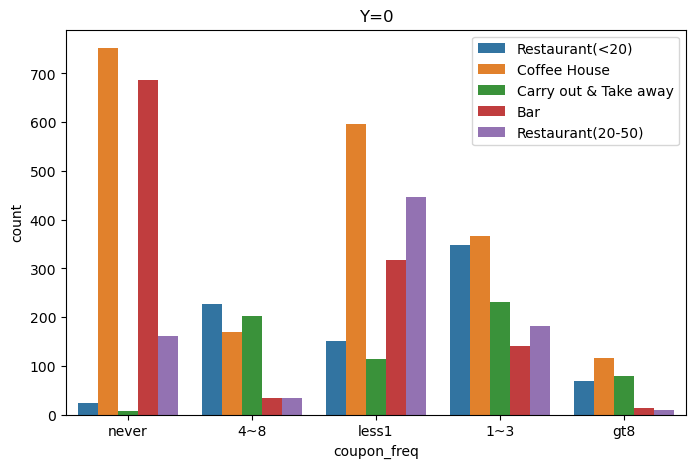

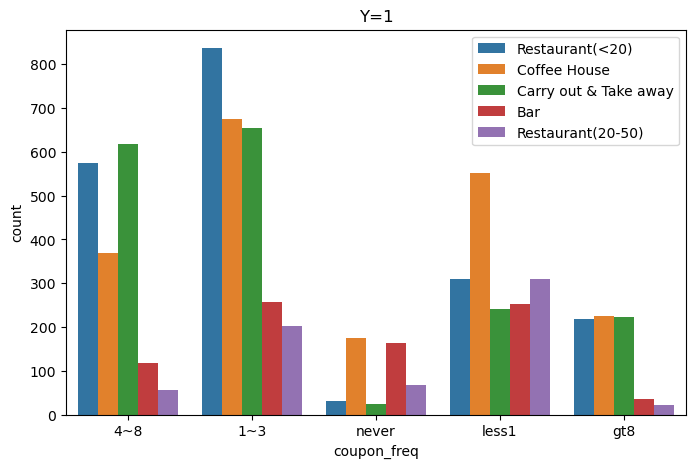

In [55]:
no = df.loc[df['Y'] == 0, ['coupon_freq']]
plt.figure(figsize=(8,5))
sns.countplot(x = no["coupon_freq"],hue = df['coupon'], data = df)
plt.legend(loc="upper right")
plt.title('Y=0')


yes = df.loc[df['Y'] == 1, ['coupon_freq']]
plt.figure(figsize=(8,5))
sns.countplot(x = yes["coupon_freq"],hue = df['coupon'], data = df)
plt.legend(loc="upper right")
plt.title('Y=1')

In [56]:
df=df.drop(["coupon_freq"],axis=1)

In [57]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [58]:
df1 = pd.get_dummies(df,columns=['destination','passanger','weather','temperature','time','coupon',\
'expiration','gender','age','maritalStatus','has_children','education','occupation','income','Bar',\
'CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ15min','toCoupon_GEQ25min',]\
                   ,drop_first=False,prefix=['destination','passanger','weather','temperature','time','coupon',\
'expiration','gender','age','maritalStatus','has_children','education','occupation','income','Bar',\
'CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ15min','toCoupon_GEQ25min'])

In [59]:
df1

,toCoupon_GEQ5min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),...,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1
0,1,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
3,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
4,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
12680,1,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
12681,1,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
12682,1,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1


# BUILDING THE MODEL

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver="sag")

In [73]:
X = df1.iloc[:,df1.columns !="Y"]
y = df1.iloc[:,df1.columns == "Y"]

In [74]:
X

,toCoupon_GEQ5min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,...,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1
0,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
3,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
4,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
12680,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
12681,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
12682,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [75]:
y

,Y
0,1
1,0
2,1
3,0
4,0
...,...
12679,1
12680,1
12681,0
12682,0


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Columns: 115 entries, toCoupon_GEQ5min to toCoupon_GEQ25min_1
dtypes: int64(4), uint8(111)
memory usage: 1.7 MB


In [77]:
 from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [79]:
model = classifier.fit(X_train, y_train.squeeze())

In [80]:
y_pred_train = model.predict(X_train)

In [81]:
y_pred_test = model.predict(X_test)

In [82]:
model.score(X_test,y_test)

0.6760378349973726

In [83]:
model.score(X_train,y_train)

0.6989186753773372

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [85]:
models = {
 LogisticRegression(random_state=1):'Logistic Regression',
 SVC(probability=True):"Support Vector Machine",
 RandomForestClassifier():'Random Forest',
 KNeighborsClassifier(n_neighbors=10): "KNN",
 GaussianNB(): "Naïve Bayes",
 AdaBoostClassifier(n_estimators=100, random_state=0):"AdaBoost"
 }
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
    print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  67.60378349973726 %
Accuracy Score for Support Vector Machine is :  74.01471361008933 %
Accuracy Score for Random Forest is :  74.3562795585917 %
Accuracy Score for KNN is :  67.2622175512349 %
Accuracy Score for Naïve Bayes is :  63.08460325801366 %
Accuracy Score for AdaBoost is :  67.65633210719916 %


### RANDOM FOREST

In [86]:
from sklearn.feature_selection import SelectFromModel

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
df_n=df1.copy()

In [104]:
df_n

,toCoupon_GEQ5min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),...,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1
0,1,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
3,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
4,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
12680,1,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
12681,1,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
12682,1,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1


In [105]:
X1=df_n.iloc[:,df_n.columns != "Y"]
y1=df_n.iloc[:,df_n.columns == "Y"]

In [106]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [107]:
X_train1.shape

(8878, 114)

In [93]:
X_test1.shape

(3806, 114)

In [94]:
y_train1.shape

(8878, 1)

In [95]:
y_test1.shape

(3806, 1)

In [96]:
model1 = classifier.fit(X_train1, y_train1.squeeze())

In [97]:
y_pred_train1 = model.predict(X_train1)

In [98]:
y_pred_test1 = model.predict(X_test1)

In [99]:
model1.score(X_test1,y_test1)

0.6760378349973726

In [100]:
model1.score(X_train1,y_train1)

0.6989186753773372

## getting the important columns using RF

In [101]:
FSRF = SelectFromModel(RandomForestClassifier(n_estimators=100))
FSRF.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [108]:
FSRF.get_support()

array([False, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True, False, False])

In [109]:
get_features = X_train.columns[(FSRF.get_support())]

In [110]:
len(get_features)

56

In [111]:
df_n=df1.copy()

In [112]:
x1 = df_n[get_features]

In [113]:
y

,Y
0,1
1,0
2,1
3,0
4,0
...,...
12679,1
12680,1
12681,0
12682,0


In [114]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y, test_size = 0.25, random_state = 0)

In [115]:
X_train1.shape

(9513, 56)

In [116]:
X_test1.shape

(3171, 56)

In [117]:
y_train1.shape

(9513, 1)

In [118]:
y_test1.shape

(3171, 1)

In [119]:
model2 = classifier.fit(X_train1, y_train1.squeeze())

In [120]:
y_pred_train1 = model2.predict(X_train1)

In [121]:
y_pred_test1 = model2.predict(X_test1)

In [122]:
model2.score(X_test1,y_test1)

0.6682434563229265

In [123]:
model2.score(X_train1,y_train1)

0.6860086197834542

In [124]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

In [125]:
param_distributions = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
scoring = make_scorer(accuracy_score)
clf = RandomizedSearchCV(rf, param_distributions, n_iter=10, scoring=scoring, cv=5, random_state=42)

clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1) 
accuracy = accuracy_score(y_test1, y_pred)
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.7473982970671712
